## Load the Cytochrome-b Sequences
Load the `.fasta` file using Biopython's `SeqIO` to parse the 12 species of penguin sequences.

In [19]:
from Bio import SeqIO

records = list(SeqIO.parse("penguins_cytb.fasta", "fasta"))
print(f"Loaded {len(records)} sequences")

Loaded 12 sequences


## Step-1: Document Dr. X's GET SEQUENCES FUNCTION

The `get_sequences_from_file(fasta_fn)` function reads a fasta file and extracts the DNA sequences for individual penguin species category. It analyses each record, takes the penguin species names from the sequence description, and stores the sequence as a value in dictionary where the key is the species name.


### Arguments:
- 'fasta_fn' (str) : This is the path to a FASTA file that contains the DNA sequences. 

### Return types:
- 'dict' : A dictionary where the keys are the names of species of penguins, for example: **"Aptenodytes forsteri"**, and values (sequences are saved as values in dictionary) are 'Seq' objects of the DNA sequences. 

*In the end, I perform a test run to validate whether the code returns what I expect. This is to make sure that the logic is correct. In this step, I test the logic of ` get_sequences_from_file(fasta_fn)` to test if this function loads all 12 penguin sequences/species name to ensure it reads the FASTA file correctly.
The output is:
- A list of the species names (keys in the dictionary), 12 penguin sequences
    



In [20]:
from Bio import SeqIO

def get_sequences_from_file(fasta_fn):
    """
    Extracts DNA sequences from a FASTA file and saves them in a dictionary using the name of species.

    Arguments:
        fasta_fn (str): The path to the FASTA file that contains the DNA sequences. This file contains nucleotide sequences, one per species, with a description header that includes the species name.

    Returns:
        dict: Dictionary with species names as keys and DNA sequences (Bio.Seq object) as values.
        
        **Keys** are basically strings that contain the species name (for example., '"Aptenodytes forsteri"'). 
        **Values** are 'seq' objects in biopython that represents the DNA sequence for each individual species.
    """
    sequence_data_dict = {} # Creates an empty dictionary to save sequences
    for record in SeqIO.parse(fasta_fn, "fasta"): # Analyses each sequence record in the FASTA file
        description = record.description.split() # Splits the description line into parts
        species_name = description[1] + " " + description[2] # Get the species and genus names for 2nd and 3rd words
        sequence_data_dict[species_name] = record.seq # Saves the sequence with the species name as the key
    return sequence_data_dict # Returns the completed dictionary

In [21]:
#Example Test Output:

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
print(f"Loaded {len(cytb_seqs)} penguin sequences.")
list(cytb_seqs.keys()) #Just to verify

Loaded 12 penguin sequences.


['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

## Step-2: Translation of nucleotides to amino acids
A function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion. It loops through the sequence in three codons, where all the codons start at codon position 1 and converts each codon into an amino acid and builds a string by converting 3-base chuncks - codons using Biopython's vertebrate mitochondrial codon table. If a stop codon is found, the translation stops there. 

   In this step, I use a custom function `manual_translate_dna()` that processes protein translation. 
   This function does the following:
   - Reads the DNA sequences 3 bases at a time
   - Uses Biopython's vertebrate mitochondrial codon table to convert codons into amino acids
   - Stops the translation when a first stop codon is recognized
   - Returns a valid protein

### Arguments:

`nuc_seq` (str or Bio.seq) : DNA sequence that can be translated which is either a string or biopython 'seq' objects. The sequence should start at position 0 and the length should be a muliple of 3. 
    
### Returns:
`aa_seq_string` (str):  Amino acid sequence that is represented by a string can be translated from the nucleotide.      Translation stops at the first stop codon and is not included in the result.
       
`str`: Amino acid sequence as a string where no stop codon has been included
        
**Unknown codons are replaced with "X"**

In the below cell, this code does exactly what the pseudocode asks rather with added error handling, comments and documentation

`def manual_translate_dna(nuc_seq):
    ...`


*In the end, I perform a test run to validate whether the code returns what I expect. This is to make sure that the logic is correct. In this step, I test the `manual_translate_dna()` function on species' DNA sequence to confirm the output:
- The first 30 amino acids 
- The total length of the protein
    




In [22]:
from Bio.Data import CodonTable

def manual_translate_dna(nuc_seq):
    """
    Translates a nucleotide sequence to an amino acid using the mentioned Vertebrate Mitochondrial Codon table.
    
    Args:
        'nuc_seq' (str or Bio.seq) : DNA sequence that can be translated which is either a string or biopython 'sseq' objects.
        
    Returns:
       `aa_seq_string` (str):  Amino acid sequence represented by a string can be translated from the nucleotide. 
        str: Amino acid sequence as a string where no stop codon has been included
 """
    
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = "" # Start with no amino acid string
    
    #For loop every 3rd position in string_nucleotides to get the codon using range subsets
    
    for i in range(0, len(nuc_seq) - 2, 3):  # iterate through 3 bases at a time in a sequence
        codon = str(nuc_seq[i:i+3])  # Move to the next 3 base codon
        if codon in mito_table.stop_codons:  
            break  # stop translation at stop codon
        elif codon in mito_table.forward_table:
            aa_seq_string += mito_table.forward_table[codon]  # Translate codon to an amino acid
        else:
            aa_seq_string += "X"  # unknown codon
    return aa_seq_string   # Return the final protein sequence

In [23]:
#Example to test the translation function with one of the sequences of one species "Aptenodytes forsteri":

for species, dna_seq in cytb_seqs.items():
    aa_seq = manual_translate_dna(dna_seq)
    print(f"{species}: Length = {len(aa_seq)} | First 10 AAs = {aa_seq[:10]}")

Aptenodytes forsteri: Length = 380 | First 10 AAs = MAPNLRKSHP
Aptenodytes patagonicus: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes chrysocome: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes chrysolophus: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes sclateri: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptula minor: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis adeliae: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis antarctica: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis papua: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus demersus: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus humboldti: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus magellanicus: Length = 380 | First 10 AAs = MAPNLRKSHP


## Step-3: An alternative translation function 

Biopython's `.translate()` works on Seq objects and uses a codon table to convert DNA sequences to protein. The Vertebrate Mitochondrial codon table will be used in this step. 

`.translate()` : A function that uses Biopython's built-in method to convert DNA sequences into an amino acid sequence using a codon table and stops translation at the first stop codon (`to_stop=True`). 

### Arguments:
`seq` (str or Bio.Seq.Seq): A nucleotide sequence that is a string or a seq object.

### Returns:
`str`: A protein sequence that is a string. Translation stops as hit by the first stop codon.

### Reference of `.translate()`
This function has been documented in the Biopython 1.79 API: [Biopython 1.79 `Seq.translate()` Documentation](https://biopython.org/docs/1.79/api/Bio.Seq.html)

*In the end, I perform a test run to validate whether the code returns what I expect. This is to make sure that the logic is correct. In this step, I test the `biopython_translate()` function on species' DNA sequence to confirm the output is 
- A protein of expected length
- Print the first 30 amino acids of the species

In [24]:
from Bio.Seq import Seq

def biopython_translate(seq):
    """
    Translates a DNA sequence into an amino acid sequence using Biopython's built-in .translate() method.

    Args:
        seq (str or Bio.Seq.Seq): DNA sequence to be translated.

    Returns:
        str: Translated amino acid sequence as a string. Stops translation at the first stop codon.
    """
    if not isinstance(seq, Seq):
        seq = Seq(seq)  # Convert to a Biopython Seq object if it has not already been done

    return str(seq.translate(table="Vertebrate Mitochondrial", to_stop=True))  # Translate using mitochondrial codon table, and stop at the first stop codon

In [25]:
for species, dna_seq in cytb_seqs.items():
    aa_seq = biopython_translate(dna_seq)
    print(f"{species}: Length = {len(aa_seq)} | First 10 AAs = {aa_seq[:10]}")

Aptenodytes forsteri: Length = 380 | First 10 AAs = MAPNLRKSHP
Aptenodytes patagonicus: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes chrysocome: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes chrysolophus: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptes sclateri: Length = 380 | First 10 AAs = MAPNLRKSHP
Eudyptula minor: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis adeliae: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis antarctica: Length = 380 | First 10 AAs = MAPNLRKSHP
Pygoscelis papua: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus demersus: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus humboldti: Length = 380 | First 10 AAs = MAPNLRKSHP
Spheniscus magellanicus: Length = 380 | First 10 AAs = MAPNLRKSHP


## Step-4: Calculate molecular weight of amino acid sequence

This step includes using Biopython's 'Protein Analysis' module to calculate an amino acid sequence. The sequence should be a clean string which contains no stop codons or invalid characters. 

### Arguments:
- `aa_seq` (str): 
A string of amino acids - protein sequence translated from a nucleotide sequence.

### Returns:
- `float` :
The molecular weight of the protein in Daltons (Da) which is calculated based on the average weight of each residue. 

### Reference:
This function has been documented from Biopython 'ProtParam' documentation: https://biopython.org/wiki/ProtParam

*In this step, I run a test code to check the output of the function using `compute_molecular_weight(aa_seq)` and get the molecular weight in return.  

In [26]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    """
    Calculates the molecular weight of an amino acid sequence using Biopython's ProteinAnalysis class.

    Args:
        aa_seq (str): Amino acid sequence (string).

    Returns:
        float: Molecular weight of the protein in Daltons.
    """
    analyzed = ProteinAnalysis(aa_seq)  # Create ProteinAnalysis object
    return analyzed.molecular_weight()  # Return molecular weight

In [27]:
## Example to test the function for this step

# Translate a sequence using the preferred function
species = "Aptenodytes forsteri"
protein = biopython_translate(cytb_seqs[species])

# Get the molecular weight
for species, dna_seq in cytb_seqs.items():
    protein = biopython_translate(dna_seq)
    mw = compute_molecular_weight(protein)
    print(f"{species}: Molecular Weight = {mw:.2f} Da")

Aptenodytes forsteri: Molecular Weight = 42459.60 Da
Aptenodytes patagonicus: Molecular Weight = 42563.71 Da
Eudyptes chrysocome: Molecular Weight = 42475.58 Da
Eudyptes chrysolophus: Molecular Weight = 42445.55 Da
Eudyptes sclateri: Molecular Weight = 42475.58 Da
Eudyptula minor: Molecular Weight = 42491.64 Da
Pygoscelis adeliae: Molecular Weight = 42458.61 Da
Pygoscelis antarctica: Molecular Weight = 42404.54 Da
Pygoscelis papua: Molecular Weight = 42595.88 Da
Spheniscus demersus: Molecular Weight = 42431.55 Da
Spheniscus humboldti: Molecular Weight = 42399.55 Da
Spheniscus magellanicus: Molecular Weight = 42459.60 Da


## Step-5: Calculate GC content of a DNA sequence

This step calculates the GC content - the percentage of nucleotides that are either guanine or cytosine in a DNA sequence. GC content can affect the stability and structure of a DNA molecule which may also vary across species. 

### Arguments:
- `dna_seq` (str or Bio.Seq.Seq):  
  A DNA sequence
  
### Returns;
- `float`:  
  GC content as a percentage (0–100%)
  
### Reference:
This function was documented from Biopython `gc_fraction()` documentation: https://biopython.org/docs/1.79/api/Bio.SeqUtils.html

*In this step, I run a test code to check the output of the function using `compute_gc_content(dna_seq)` and returns the GC content of a DNA sequence value.


In [28]:
from Bio.SeqUtils import gc_fraction

def compute_gc_content(dna_seq):
    """
    Calculates the GC content of a DNA sequence as a percentage.

    Args:
        dna_seq (str or Seq): DNA sequence.

    Returns:
        float: GC content percentage (0–100).
    """
    return gc_fraction(dna_seq) * 100  # Convert from decimal to percent

In [29]:
#Example to test the fucntion

for species, dna_seq in cytb_seqs.items():
    gc = compute_gc_content(dna_seq)
    print(f"{species}: GC Content = {gc:.2f}%")

Aptenodytes forsteri: GC Content = 48.38%
Aptenodytes patagonicus: GC Content = 49.69%
Eudyptes chrysocome: GC Content = 51.18%
Eudyptes chrysolophus: GC Content = 50.92%
Eudyptes sclateri: GC Content = 50.83%
Eudyptula minor: GC Content = 49.26%
Pygoscelis adeliae: GC Content = 49.08%
Pygoscelis antarctica: GC Content = 47.77%
Pygoscelis papua: GC Content = 47.16%
Spheniscus demersus: GC Content = 48.29%
Spheniscus humboldti: GC Content = 49.26%
Spheniscus magellanicus: GC Content = 48.21%


## Step-6: Add new empty columns to store molecular weight and GC content of a DNA sequence

In this step, I am preparing a dataframe directly into my main script that holds the computed values for each species. It describes the object being modified, the columns that are being added, and the role of those columns.

This step contains modification of the penguin dataframe by adding two new columns:
1. `molecular_weight` : Holds the molecular weight of the translated protein sequence,an emtpy column (initially NaN) which will later be stored with the calculated molecular weight of each species' cytochrome-b protein

2. `gc_content` : Holds the GC content of the corresponding DNA sequence, an empty column (initially NaN) which will later be stored with the GC content(%) of each species' DNA seqyence

Here, I set the value to 'NaN' to indicate that these cells are currently empty and holds no value.
- The empty columns will be filled with custom functions in Step-7.


In [30]:
import numpy as np
import pandas as pd

# Load the original penguin body mass data
penguins_df = pd.read_csv("penguins_mass.csv")

# Add new empty columns to store molecular weight and GC content
penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan

# Check the updated DataFrame
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


## Step-7: Function to translate each sequence and fill in molecular weight and GC content columns

For this step, I already have:
- `penguins_df` dataframe with species names
- DNA sequences loaded into `cytb_seqs`

**This step functions to:**
- Translate the DNA sequences into valid proteins
- Calculate the molecular weight of the translated protein sequence
- Calculate the GC content of the corresponding DNA sequence

### Fill in the dataframe columns with computed values
Store the molecular weight and GC content of the DNA sequence values in the corresponding rows of the DataFrame using our previously defined functions:
- `biopython_translate()`
- `compute_molecular_weight()`
- `compute_gc_content()`


In [31]:
# Loop through each row in the DataFrame
for i, row in penguins_df.iterrows():
    species = row["species"]

    if species in cytb_seqs:
        dna_seq = cytb_seqs[species]
        protein_seq = biopython_translate(dna_seq) #Translate DNA into protein
        
        # Compute values using your functions
        mw = compute_molecular_weight(protein_seq)
        gc = compute_gc_content(dna_seq)
        
        # Update the DataFrame
        penguins_df.at[i, "molecular_weight"] = mw
        penguins_df.at[i, "gc_content"] = gc
    else:
        print(f"Warning: No sequence found for {species}")

In [32]:
#Preview the data
penguins_df.head()

,species,mass,molecular_weight,gc_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146


## Step-8: Data visualization - Bar chart of adult body mass per species

This step is dedicated to creating a bar chart showing the average adult body mass (in grams) of each penguin species. The data is taken from the `penguin_mass.csv` file, and x-axis displays the species names of penguins. 

To build a labelled bar plot, Seaborn or Matplotlib has been used and the species was sorted according to species by mass and applied a custom color palette. 

### Interpretation:
What is the smallest penguin species? 
- The smallest penguin species is **Eudyptula minor**, based on the bar chart.

What is the geographical range of this species?
- **Eudyptula minor** (also called the Little Blue Penguin or Fairy Penguin) is native to coastal southern Australia and New Zealand.


**Reference:**
The geographic range of **Eudyptula minor** species was taken from Animal Diversity Web: https://animaldiversity.org/accounts/Eudyptula_minor/

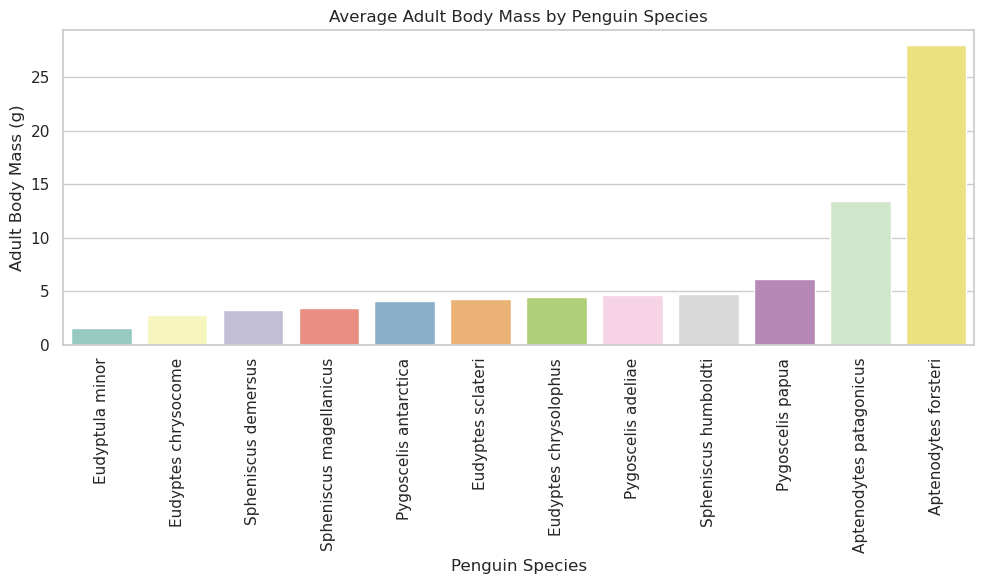

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort DataFrame for nicer visual order
penguins_df_sorted = penguins_df.sort_values("mass")

# Choose a color palette
palette = "Set3"  # or custom list

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=penguins_df_sorted,
    x="species",
    y="mass",
    hue="species",        # explicitly set hue
    dodge=False,           # disable grouped bars
    palette=palette,
    legend=False           # remove redundant legend
)

# Format axes
plt.xticks(rotation=90)
plt.xlabel("Penguin Species")
plt.ylabel("Adult Body Mass (g)")
plt.title("Average Adult Body Mass by Penguin Species")

plt.tight_layout()
plt.show()

## Step-9: Data visualization of the molecular weight as a function of GC-content

This step shows a biological trend or visualization of a relationship between GC content of cytochrome-b DNA sequence and molecular weight of translated proteins across penguin species. 

In this plot:
- Each point in X-axis represents the GC content(%) of cytochrome-b DNA sequences 
- Each point in Y-axis represents the molecular weight of translated proteins in Daltons (Da)

To build a scatter plot, Seaborn or Matplotlib has been used and applied a custom color palette. 

### Interpretation or key observations from the scatter plot:
- GC content ranges from 47% to 51%, and molecular weight ranges from 42,400 Da to 42,600 Da
- No strong trend or correlation between the GC content and molecular weight is observed, suggesting they both do not influence the size of the translated cytochrome-b protein
- **Aptenodytes forsteri** has the highest molecular weight despite relatively low GC content.
- The smallest penguin species **Eudyptula minor** falls in the middle of both axes.

*This interpretation from the scatter plot suggests that the traits in cytochrome-b vary independently.


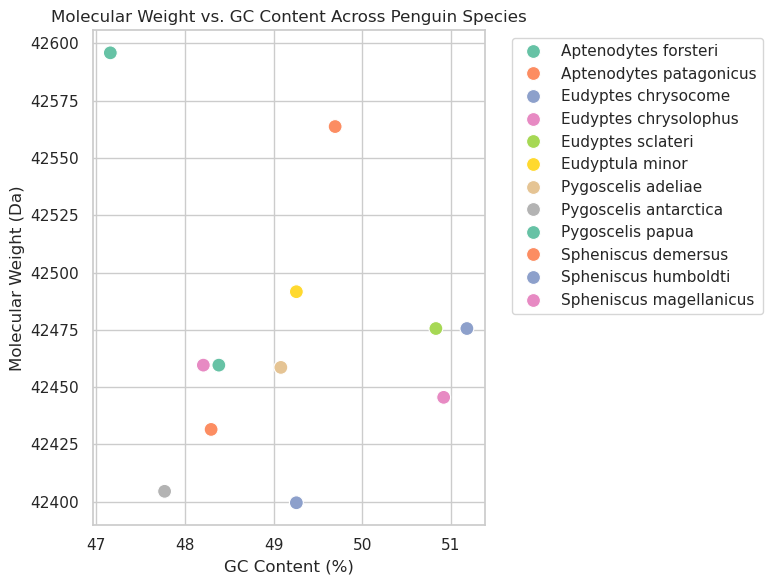

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_df,
    x="gc_content",
    y="molecular_weight",
    hue="species",  # Optional: adds color per species
    palette="Set2",
    s=100  # marker size
)

# Add plot labels and title
plt.xlabel("GC Content (%)")
plt.ylabel("Molecular Weight (Da)")
plt.title("Molecular Weight vs. GC Content Across Penguin Species")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend out of plot

plt.tight_layout()
plt.show()

## Step 10: Export Final DataFrame to CSV

The updated DataFrame now includes molecular weight and GC content values for each penguin species which is saved to a new CSV file called `penguins_mass_cytb.csv`.

This file contains all key variables needed for further analysis and visualization.

In [30]:
# Save the DataFrame to a new CSV file
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

# Confirm success
print("File 'penguins_mass_cytb.csv' saved successfully!")

File 'penguins_mass_cytb.csv' saved successfully!


## Step-11: Bonus Visualization

As a bonus analysis, I explored a heatmap to visually examine the pairwise correlation between adult body mass, GC content, and protein molecular weight across penguin species.

The values range from -1 to 1:
- 1 = perfect positive correlation
- 0 = no correlation
- -1 = perfect negative correlation


#### Key Observations:
- **Mass vs. Molecular Weight**: Weak positive correlation (+0.16). Penguins with greater body mass may tend to have slightly heavier proteins.
- **Mass vs. GC Content**: Weak negative correlation (−0.18), suggesting high protein content penguins may have slightly lower GC content.
- **GC Content vs. Molecular Weight**: Very weak and likely insignificant (−0.10).

These results indicate that for the cytochrome-b gene, **traits like GC content do not strongly predict protein mass or body mass** amongst various species of penguins.

This provided additional insight into the relationships between sequence composition, molecular features, and physical traits in penguins.

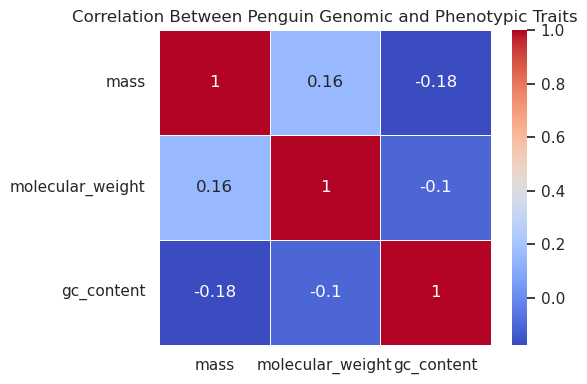

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
corr_data = penguins_df[["mass", "molecular_weight", "gc_content"]]

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Penguin Genomic and Phenotypic Traits")
plt.tight_layout()
plt.show()

### Step-11 Part-B: Bonus Visualization: What else can we do with this dataset in Python? 

To explore potential ecological influences on DNA composition, we can compare the average GC content between **Antarctic** and **Non-Antarctic** penguins.

This plot:
- Groups penguins by region and calculates the average GC content for each group using .groupby() and .mean()

This quick comparison suggests whether cold-adapted species have distinctive genome characteristics (e.g., stability via GC-rich DNA). 
Note: more genes and species would be needed to draw stronger conclusions.

In [37]:
# Group by region and calculate mean GC content
gc_by_region = penguins_df.groupby("region")["gc_content"].mean() #calculate the mean GC content for each group

print("Average GC Content by Region:")
print(gc_by_region)

Average GC Content by Region:
region
Antarctic        48.097113
Non-Antarctic    49.704724
Name: gc_content, dtype: float64


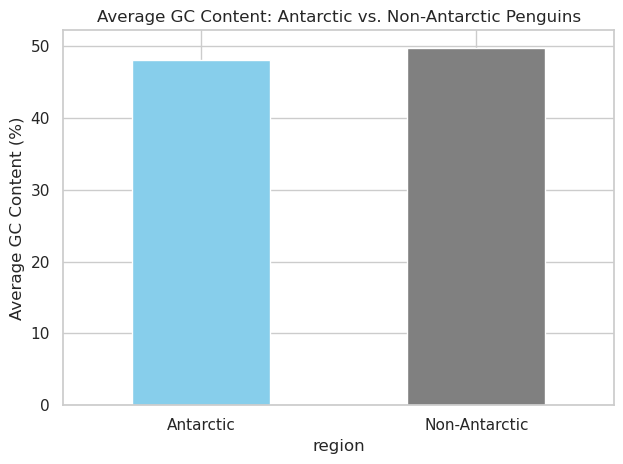

In [38]:
# Plot the average GC content using a bar chart
gc_by_region.plot(kind="bar", color=["skyblue", "gray"])

# Add axis labels and title
plt.ylabel("Average GC Content (%)")
plt.title("Average GC Content: Antarctic vs. Non-Antarctic Penguins")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()